# Carga de datos

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Carga
df = pd.read_csv('data/departamentos_clean.csv')
df.shape

(2349, 16)

# Análisis Exploratorio de Datos (AED)

In [5]:
# Observación de los primeros datos del conjunto
df.head()

,preferencia,comuna,estacion_cercana,distancia_estacion,dormitorios,baños,estacionamientos,bodegas,superficie_total,superficie_util,precio,gastos_comunes,direccion,total,long,lat
0,0,La Reina,Príncipe de Gales,412.0,3.0,2.0,1.0,1.0,118.0,98.0,820000.0,110000.0,"Las Arañas/ Av. Ossa/ Metro Príncipe De Gales,...",930000.0,-70.573090,-33.439160
1,0,La Reina,Príncipe de Gales,425.0,4.0,3.0,3.0,2.0,135.0,128.0,1400000.0,180000.0,"Loreley 1736, La Reina, Chile, Metro Príncipe ...",1580000.0,-70.571120,-33.438550
2,0,La Reina,Fernando Castillo Velasco,1433.0,2.0,1.0,0.0,0.0,45.0,45.0,370000.0,5000.0,"José Arrieta 6855, Penalolen, Peñalolén, Chile...",375000.0,-70.558282,-33.462591
3,0,La Reina,Sin estación cercana,3000.0,3.0,3.0,3.0,1.0,190.0,140.0,1898413.0,0.0,"Alvaro Casanova 1453, La Reina, Chile, La Rein...",1898413.0,-70.518982,-33.442836
4,0,La Reina,Príncipe de Gales,966.0,4.0,3.0,2.0,0.0,162.0,137.0,1500000.0,200000.0,"Pje. Nocedal 6300 - 6600, Santiago, La Reina, ...",1700000.0,-70.565636,-33.436799


In [6]:
# Tipos de datos del conjunto
df.dtypes

preferencia             int64
comuna                 object
estacion_cercana       object
distancia_estacion    float64
dormitorios           float64
baños                 float64
estacionamientos      float64
bodegas               float64
superficie_total      float64
superficie_util       float64
precio                float64
gastos_comunes        float64
direccion              object
total                 float64
long                  float64
lat                   float64
dtype: object


### Variable Y de respuesta :

- preferencia

### Variables X predictoras :

Variables categoricas,

- comuna
- estacion_cercana

Variables cuatitativas discretas,

- dormitorios
- baños
- estacionamientos
- bodegas

Variables cuantitativas continuas,

- distancia_estacion
- superficie_total
- superficie_util
- precio
- gastos_comunes
- total

### Resumen de la variable Y de respuesta: preferencia

In [7]:
df.groupby(['preferencia'])['preferencia'].count().sort_values(ascending=False)

preferencia
0    2299
1      50
Name: preferencia, dtype: int64

### Resumen de variables predictora cuantitativas

In [8]:
# Resumén estadístico de variables númericas
df[df.columns[~df.columns.isin(['preferencia'])]].describe()

,distancia_estacion,dormitorios,baños,estacionamientos,bodegas,superficie_total,superficie_util,precio,gastos_comunes,total,long,lat
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2.349000e+03,2.349000e+03,2.349000e+03,2301.000000,2301.000000
mean,1275.332056,2.501916,2.320988,1.322691,0.547041,132.180549,129.173252,1.287628e+06,1.838016e+05,1.471429e+06,-70.588390,-33.419892
std,1117.592721,1.041973,1.038028,0.885574,0.690669,105.860037,786.298474,9.500667e+05,2.302229e+05,1.091731e+06,0.158452,0.459424
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.900000e+05,0.000000e+00,2.450000e+05,-77.125984,-37.092058
25%,428.000000,2.000000,2.000000,1.000000,0.000000,63.000000,58.000000,6.500000e+05,7.000000e+04,7.396180e+05,-70.600309,-33.438995
50%,700.000000,2.000000,2.000000,1.000000,1.000000,98.000000,90.000000,1.000000e+06,1.280000e+05,1.130000e+06,-70.589420,-33.418012
75%,3000.000000,3.000000,3.000000,2.000000,1.000000,160.000000,140.000000,1.576648e+06,2.400000e+05,1.795766e+06,-70.571282,-33.411836
max,3000.000000,8.000000,8.000000,8.000000,16.000000,1000.000000,38000.000000,9.685124e+06,5.000000e+06,1.000000e+07,-70.497743,-12.050849


Text(0.5, 0.98, 'Diagramas de barras de dormitorios, baños y estacionamientos')

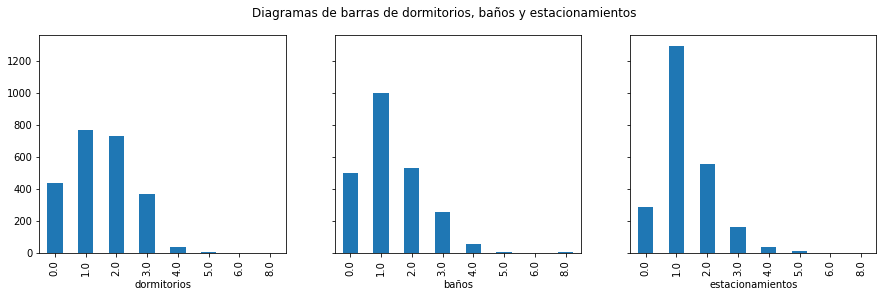

In [9]:
figure, axs = plt.subplots(1,3, figsize=(15,4), sharey=True, sharex=True)
df.groupby(['dormitorios'])['dormitorios'].count().plot(kind='bar', ax=axs[0])
df.groupby(['baños'])['baños'].count().plot(kind='bar', ax=axs[1])
df.groupby(['estacionamientos'])['estacionamientos'].count().plot(kind='bar', ax=axs[2])
plt.suptitle("Diagramas de barras de dormitorios, baños y estacionamientos")

Text(0.5, 1.0, 'Histograma de distancias a estaciones más cercanas')

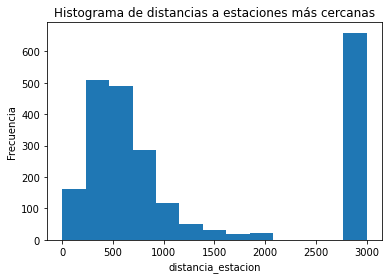

In [10]:
k = int(np.ceil(1+np.log2(3333)))
plt.hist(df["distancia_estacion"], bins = k)
plt.xlabel("distancia_estacion")
plt.ylabel("Frecuencia")
plt.title("Histograma de distancias a estaciones más cercanas")

Text(0.5, 1.0, 'Histograma de superficie util (m2)')

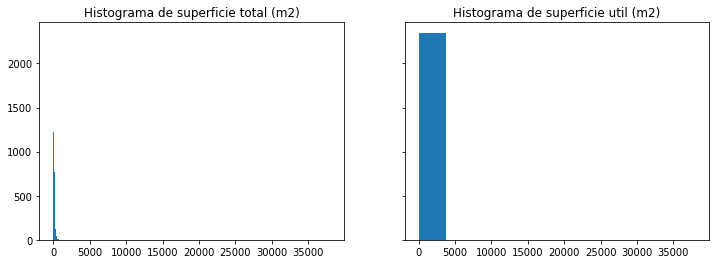

In [11]:
figure, axs = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)
axs[0].hist(df["superficie_total"])
axs[0].set_title("Histograma de superficie total (m2)")
axs[1].hist(df["superficie_util"])
axs[1].set_title("Histograma de superficie util (m2)")

Text(0.5, 1.0, 'Histograma de totales en CLP')

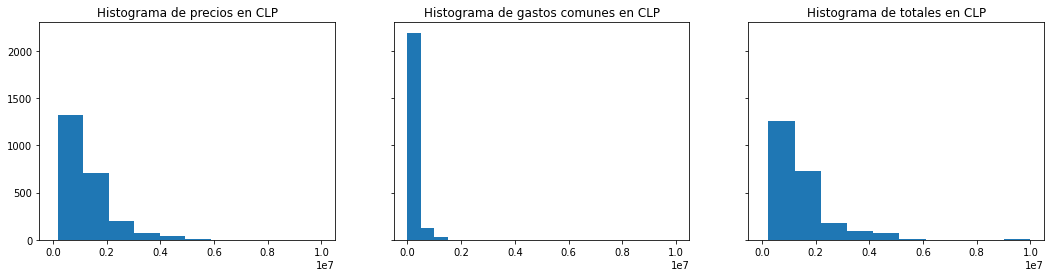

In [12]:
figure, axs = plt.subplots(1,3, figsize=(18,4), sharey=True, sharex=True)
axs[0].hist(df["precio"])
axs[0].set_title("Histograma de precios en CLP")
axs[1].hist(df["gastos_comunes"])
axs[1].set_title("Histograma de gastos comunes en CLP")
axs[2].hist(df["total"])
axs[2].set_title("Histograma de totales en CLP")

### Resumen de variables predictora categoricas

In [13]:
# Resumén estadístico de variables categoricas
df.describe(include = ['O'])

,comuna,estacion_cercana,direccion
count,2349,2349,2349
unique,7,46,1853
top,Las Condes,Sin estación cercana,"El Golf, Barrio El Golf, Las Condes, RM (Metro..."
freq,1377,659,41


In [14]:
# Resumen por comuna
df.groupby(['comuna'])['comuna'].count().sort_values(ascending=False)

comuna
Las Condes     1377
Providencia     427
Ñuñoa           334
Macul           140
La Reina         34
Peñalolén        23
La Florida       14
Name: comuna, dtype: int64

In [15]:
# Resumen por estción cercana, 10 primeras (de 45)
df.groupby(['estacion_cercana'])['estacion_cercana'].count().sort_values(ascending=False).head(10)

estacion_cercana
Sin estación cercana      659
Alcántara                 269
Manquehue                 160
Escuela Militar           133
El Golf                   112
Tobalaba                  109
Cristóbal Colón            88
Inés de Suárez             82
Hernando de Magallanes     71
Monseñor Eyzaguirre        56
Name: estacion_cercana, dtype: int64

Text(0.5, 1.0, 'Scatterplot de lat y long')

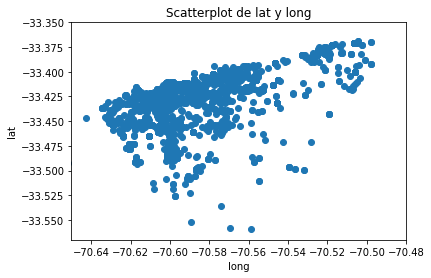

In [16]:
plt.scatter(df['long'], df['lat'])
plt.xlim([-70.65, -70.48])
plt.ylim([-33.57, -33.35])
plt.ylabel('lat')
plt.xlabel('long')
plt.title("Scatterplot de lat y long")

['San Joaquín' 'San Miguel' 'San Ramón' 'Independencia' 'La Cisterna'
 'Peñalolén' 'Providencia' 'La Reina' 'Santiago' 'Huechuraba' 'Cerrillos'
 'Cerro Navia' 'Vitacura' 'Conchalí' 'El Bosque' 'Estación Central'
 'La Florida' 'La Granja' 'La Pintana' 'Las Condes' 'Lo Espejo' 'Lo Prado'
 'Macul' 'Maipú' 'Ñuñoa' 'Pedro Aguirre Cerda' 'Pudahuel' 'Quilicura'
 'Quinta Normal' 'Recoleta' 'Renca']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/2k/5t6mlmdn1l10czqzym7vf80c0000gp/T/ipykernel_28881/557157209.py:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Lef

Text(0.5, 1.0, 'Rent Apartments 2022 - Santiago, Chile')

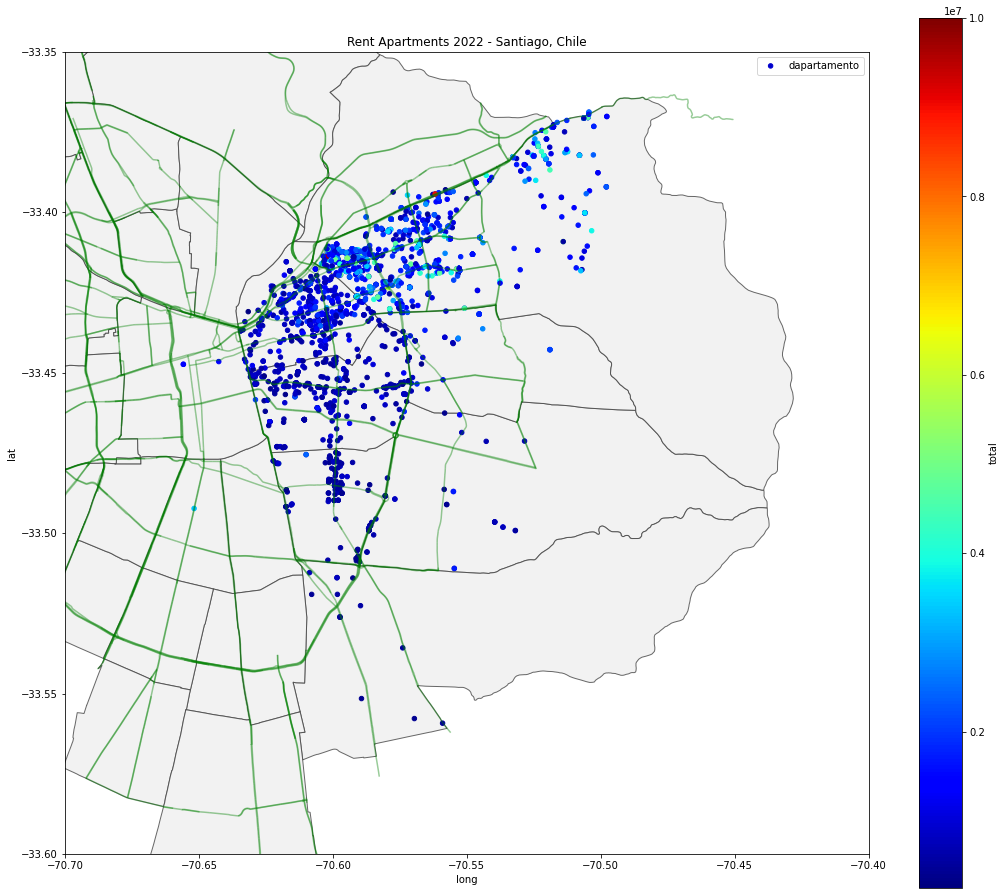

In [17]:
# Santiago
sf_path = "data/shp/comunas/comunas.shp"
sf = gpd.read_file(sf_path, encoding='utf-8')
stgo_sf = sf[(sf.Provincia == 'Santiago') & (sf.Comuna != 'Lo Barnechea')]
print(pd.unique(stgo_sf.Comuna))
stgo_shape = stgo_sf.to_crs({'init': 'epsg:4326'})
# Principales avenidas
roads_path = "data/shp/rutas/gis_osm_roads_free_1.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')
roads = gpd.sjoin(roads, stgo_shape, op='intersects')
main_roads = roads[(roads.fclass == 'primary') | (roads.fclass == 'motorway')]
# Plot
ax = stgo_shape.plot(figsize=(18,16), color='#EFEFEF', edgecolor='#444444', alpha = 0.8)
main_roads.plot(ax=ax, color='green', markersize=0.1, alpha = 0.4)
df.plot(x = 'long', y = 'lat', kind = 'scatter', c = 'total', cmap=plt.get_cmap("jet"), label = 'dapartamento', colorbar = True, ax=ax, alpha = 1)
plt.ylim([-33.6, -33.35])
plt.xlim([-70.7, -70.40])
plt.title("Rent Apartments 2022 - Santiago, Chile")

## AED del subconjunto: total menor igual a 600.000 CLP

In [18]:
# Filtrar departamentos menores o iguales a 600.000 CLP
df = df.loc[(df['total'] <= 700000)]

### Resumen de la variable Y de respuesta: preferencia

In [19]:
df.groupby(['preferencia'])['preferencia'].count().sort_values(ascending=False)

preferencia
0    471
1     50
Name: preferencia, dtype: int64

### Resumen de variables predictora cuantitativas

In [20]:
# Resumén estadístico de variables númericas
df[df.columns[~df.columns.isin(['preferencia'])]].describe()

,distancia_estacion,dormitorios,baños,estacionamientos,bodegas,superficie_total,superficie_util,precio,gastos_comunes,total,long,lat
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,515.000000,515.000000
mean,1043.608445,1.537428,1.341651,0.719770,0.439539,50.212131,47.048599,503211.652591,59703.289827,562914.942418,-70.595967,-33.451678
std,1036.041659,0.637785,0.474719,0.470447,0.519514,14.219878,14.266673,81347.746774,38105.816581,92048.480779,0.022152,0.031030
min,46.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,190000.000000,0.000000,245000.000000,-70.634435,-33.559166
25%,337.000000,1.000000,1.000000,0.000000,0.000000,40.000000,37.000000,450000.000000,40000.000000,500000.000000,-70.610676,-33.475613
50%,582.000000,1.000000,1.000000,1.000000,0.000000,48.000000,45.000000,500000.000000,65000.000000,577000.000000,-70.598435,-33.453065
75%,1370.000000,2.000000,2.000000,1.000000,1.000000,60.000000,58.000000,560000.000000,85000.000000,636991.000000,-70.585360,-33.428545
max,3000.000000,3.000000,2.000000,2.000000,4.000000,121.000000,85.000000,700000.000000,350000.000000,700000.000000,-70.505950,-33.370740


Text(0.5, 0.98, 'Diagramas de barras de dormitorios, baños y estacionamientos')

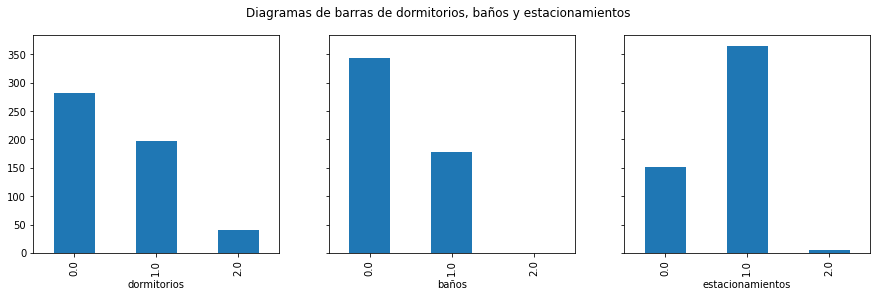

In [21]:
figure, axs = plt.subplots(1,3, figsize=(15,4), sharey=True, sharex=True)
df.groupby(['dormitorios'])['dormitorios'].count().plot(kind='bar', ax=axs[0])
df.groupby(['baños'])['baños'].count().plot(kind='bar', ax=axs[1])
df.groupby(['estacionamientos'])['estacionamientos'].count().plot(kind='bar', ax=axs[2])
plt.suptitle("Diagramas de barras de dormitorios, baños y estacionamientos")

Text(0.5, 1.0, 'Histograma de distancias a estaciones más cercanas')

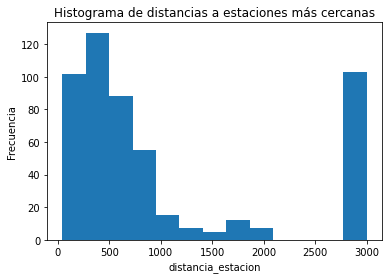

In [22]:
k = int(np.ceil(1+np.log2(3333)))
plt.hist(df["distancia_estacion"], bins = k)
plt.xlabel("distancia_estacion")
plt.ylabel("Frecuencia")
plt.title("Histograma de distancias a estaciones más cercanas")

Text(0.5, 1.0, 'Histograma de superficie util (m2)')

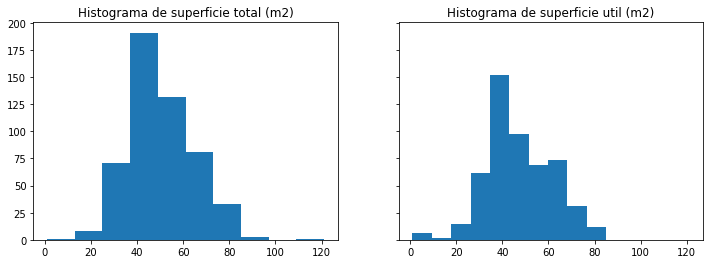

In [23]:
figure, axs = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)
axs[0].hist(df["superficie_total"])
axs[0].set_title("Histograma de superficie total (m2)")
axs[1].hist(df["superficie_util"])
axs[1].set_title("Histograma de superficie util (m2)")

Text(0.5, 1.0, 'Histograma de totales en CLP')

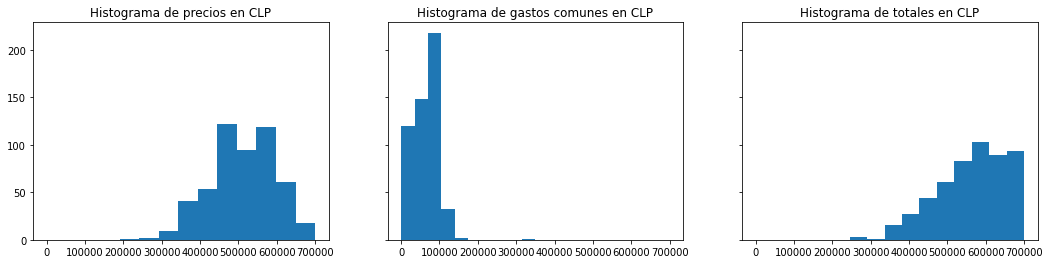

In [24]:
figure, axs = plt.subplots(1,3, figsize=(18,4), sharey=True, sharex=True)
axs[0].hist(df["precio"])
axs[0].set_title("Histograma de precios en CLP")
axs[1].hist(df["gastos_comunes"])
axs[1].set_title("Histograma de gastos comunes en CLP")
axs[2].hist(df["total"])
axs[2].set_title("Histograma de totales en CLP")

### Resumen de variables predictora categoricas

In [25]:
# Resumén estadístico de variables categoricas
df.describe(include = ['O'])

,comuna,estacion_cercana,direccion
count,521,521,521
unique,7,46,463
top,Ñuñoa,Sin estación cercana,"Vicente Huidobro 3300 - 3600, Macul, Chile, Vi..."
freq,190,103,4


In [26]:
# Resumen por comuna
df.groupby(['comuna'])['comuna'].count().sort_values(ascending=False)

comuna
Ñuñoa          190
Macul          127
Providencia    113
Las Condes      60
La Florida      13
La Reina         9
Peñalolén        9
Name: comuna, dtype: int64

In [27]:
# Resumen por estción cercana, 10 primeras (de 45)
df.groupby(['estacion_cercana'])['estacion_cercana'].count().sort_values(ascending=False).head(10)

estacion_cercana
Sin estación cercana    103
Irarrázaval              26
Rodrigo de Araya         24
Chile España             23
Monseñor Eyzaguirre      23
Estadio Nacional         22
Las Torres               22
Macul                    20
Villa Frei               20
Inés de Suárez           17
Name: estacion_cercana, dtype: int64

In [37]:
# Santiago
sf_path = "data/shp/comunas/comunas.shp"
sf = gpd.read_file(sf_path, encoding='utf-8')
stgo_sf = sf[(sf.Provincia == 'Santiago') & (sf.Comuna != 'Lo Barnechea')]
print(pd.unique(stgo_sf.Comuna))
stgo_shape = stgo_sf.to_crs({'init': 'epsg:4326'})
# Principales avenidas
roads_path = "data/shp/rutas/gis_osm_roads_free_1.shp"
roads = gpd.read_file(roads_path, encoding='utf-8')
roads = gpd.sjoin(roads, stgo_shape, op='intersects')
main_roads = roads[(roads.fclass == 'primary') | (roads.fclass == 'motorway')]
# Estaciones Metro Santiago
metro = pd.read_csv('../scraping/output/estaciones.csv')
# Plot
ax = stgo_shape.plot(figsize=(18,16), color='#EFEFEF', edgecolor='#444444', alpha = 0.8)
main_roads.plot(ax=ax, color='green', markersize=0.1, alpha = 0.3)
df.plot(ax=ax, x = 'long', y = 'lat', kind = 'scatter', c = 'precio', cmap=plt.get_cmap("jet"), s = df['superficie_util']*2, 
label = 'dapartamento', colorbar = True, alpha = 0.7)
metro.plot(ax=ax, x = 'long', y = 'lat', kind = 'scatter', marker = 'x', color = 'black', label = 'estación de metro')
plt.ylim([-33.57, -33.35])
plt.xlim([-70.7, -70.46])
plt.title("Rent Apartments 2022 - Santiago, Chile")

['San Joaquín' 'San Miguel' 'San Ramón' 'Independencia' 'La Cisterna'
 'Peñalolén' 'Providencia' 'La Reina' 'Santiago' 'Huechuraba' 'Cerrillos'
 'Cerro Navia' 'Vitacura' 'Conchalí' 'El Bosque' 'Estación Central'
 'La Florida' 'La Granja' 'La Pintana' 'Las Condes' 'Lo Espejo' 'Lo Prado'
 'Macul' 'Maipú' 'Ñuñoa' 'Pedro Aguirre Cerda' 'Pudahuel' 'Quilicura'
 'Quinta Normal' 'Recoleta' 'Renca']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


KeyboardInterrupt: 